# MNIST DIGIT RECOGNIZER USING CNN KERAS []

# [Please  star/upvote if u like it.]

## CONTENTS:

#### 1 ) Importing Various Modules

#### 2 ) Loading the training and testing files

#### 3 ) Preparing the Data

#### 4 ) Modelling

####  5 ) Making Predictions on the Validation Set

#### 6 ) Evaluating the Model Performance

#### 7 ) Making Submission to Kaggle

## 1 ) Importing Various Modules

In [0]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import missingno as msno

#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
% matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#import the necessary modelling algos.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTE

#preprocess.
from sklearn.preprocessing import MinMaxScaler,StandardScaler,Imputer,LabelEncoder,OneHotEncoder
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 

import tensorflow as tf
import random as rn

## 2 ) Loading the training and testing files

In [0]:
train=pd.read_csv(r'C:\Users\HP\jupyter notebooks\kaggle\digit recognizer\train.csv')
test=pd.read_csv(r'C:\Users\HP\jupyter notebooks\kaggle\digit recognizer\test.csv')
df=train.copy()
df_test=test.copy()

In [6]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 3 ) Preparing the Data

## 3.1 ) Shape of Training/Testing Set

In [7]:
df.shape

(42000, 785)

A training set of 42000 images. We shall use some of these images later on for creating our validation set. The images are of 28*28 pixels and one extra column is for the label of the digit (0 1 2... etc...)

In [8]:
df_test.shape 

(28000, 784)

The test set contains 28000 images of 28*28 pixels.

## 3.2 ) Visualizing Number of Images for each Digit 

In [9]:
df['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

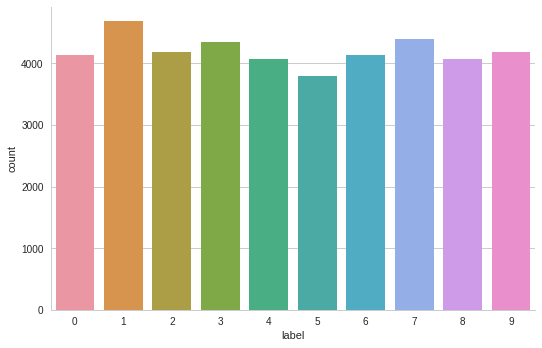

In [10]:
sns.factorplot(data=df,kind='count',x='label',size=5,aspect=1.5)

Now we can randomly see some images from the training set. Lets see the first say 10 images.

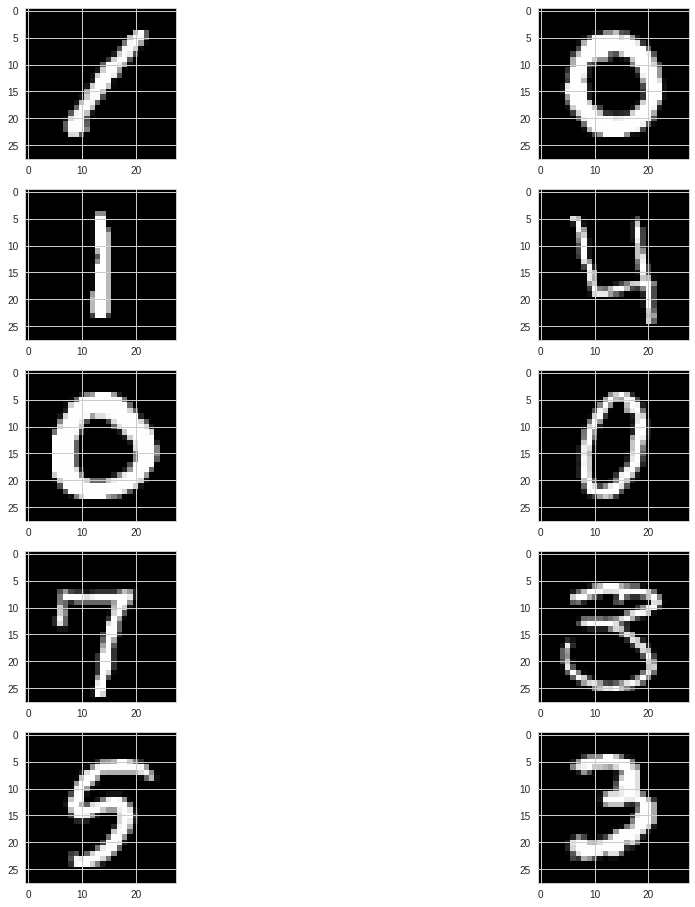

In [11]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
count=0
for i in range(5):
    for j in range (2):
        ax[i,j].imshow(df.drop('label',axis=1).values[count].reshape(28,28),cmap='gray')
        count+=1

The countplot shows the number of images for each digit. For eg---> 1 has 4684 images and so on for other digits... .

## 3.3 ) Converting from Data Frame to Numpy Arrays

Note that to feed our data to a neural network or more specifically a ConvNet model in our case; we need to convert it to numpy arrays holding the respective pixel values. To do this we use the '.values' attribute on the data frame.

In [0]:
X=df.drop('label',axis=1).values
Y=df['label'].values

In [13]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## 3.4 ) One Hot Encoding the Target

Note that there are two main things to watch out before feeding data into a neural network.

The first is that our data needs to be in the form of numpy arrays (ndarray) which we did in previous section.

The second that the target variable should be one hot encoded eg 2--> 0010 (assuming 0 based indexing) and so on.. In this way for a 'n' class classification problems our target variable will have n classes and hence after one hot encoding we shall have n labels with each label corressponding to a particular target class.

Here we have 10 digits (or target classes) ie from 0--->9 and so we one hot encode the target using 10 classes.

In [0]:
Y=to_categorical(Y,10)  

## 3.5 ) Splitting into Training and Validation Sets.


In [0]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

## 3.6 ) Normalizing the Features

Note that the neural networks are quite sensitive towards the scale of the features. Hence it is always good to perform feature scaling on the data before feeding it into a Neural Network.

Below I have scaled the pixel values by dividing by 255 since the max pixel value is 255.

Actually it is based on 

x=(x-min)/(max-min) ;where min=0 and max=255 for our case.

In [0]:
x_train=x_train/255  
x_test=x_test/255
num_test=df_test.values
num_test=num_test/255

## 3.7 ) Reshaping the Images

Note that to feed our data to a ConvNet model we need to make its shape correct. 

Since we have 784 pixel values , we resize each images to 28*28 pixels. Also since it is a grayscale image it has only one channel(unlike a RGB image which has 3 channels; one corressponding to each color).

Now we reshape our training , validation and test sets. The first dimension of each is the number of observations in the set. What follows is the dimensions of the image in "channels_last" order ie (no of obs., width,height,depth).

In [0]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)
num_test=num_test.reshape(num_test.shape[0],28,28,1)

In [18]:
x_train.shape

(33600, 28, 28, 1)

## 3.8 ) Setting the Random Seeds

Setting the seeds for reproducibility.

In [0]:
np.random.seed(42)

In [0]:
rn.seed(42)

In [0]:
tf.set_random_seed(42)

## 4 ) Modelling 

## 4.1 ) Building a Convolutional Neural Network using Keras

In [0]:
# modelling starts using a CNN.

model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),strides=1,padding='same',data_format="channels_last",activation='relu',
                 input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(filters=32,kernel_size=(3,3),strides=1,padding='same',data_format="channels_last",activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid', data_format="channels_last"))
model.add(Dropout(0.20))

model.add(Conv2D(filters=64,kernel_size=(3,3),strides=1,padding='same',data_format="channels_last",activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=1,padding='same',data_format="channels_last",activation='relu'))
model.add(BatchNormalization()) 
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid', data_format="channels_last"))
model.add(Dropout(0.20))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.50))
model.add(Dense(10, activation='softmax'))


#### BREAKING IT DOWN--

1.) First we create a Keras Sequential model which is nothing but a stack of layers.

2.) Next we have to add the convolutional and the pooling layers to our model. The number of convolutional layers as well as the number and position of a pooling layer is a hyperparameter which we need to decide. Also we have other hyperparameters such as the 'activation function','stride','padding','the number as well as the size of the filter' and etc... .

  Note that in a ConvNet the convolution layer generally has the padding of zeros so that the spatial dimesnions of input volume and output volume are same. Hence we have used the 'padding='same'' arguement. Whereas in a pooling layer the padding is not applied in general.
  
  Also note that we have other types of pooling operations also but MaxPooling layer is known to perform better in most cases.

3.) To further improve the model performance we can use the batch normalization. In our model I have used the batch normalization after each convolutonal layer but that depends on us.

4.) In order to further prevent overfitting we can use the 'Dropout' technique. The dropout randomly drops nodes from the network and thus reduces the dependency on any one neuron. Because of this each neuron learns better and the whole network's performance is expected to get better. To use Dropout we need to set the 'DroputRate' which  is the fraction of the neurons to drop at random from each layer in the network. Note that Dropout is in general applied after the MaxPooling operation.

5.) After this what follows is fully connected layers similar to what we would expect in the artificial neural network. Since it expects 1D input we add a Flatten layer to precede it.

6.) Note that we can add as many fully connected layers as we want and can use Batch Normalization and Dropout here too.
    The number of the units and the activation function('relu' used here) are the hyperparameters as usual.

7.) Lastly what follows is the output layer. The output units in the output layer equals the number of categories in which we want to classify the target.The activation funtion used is 'softmax' since we have a multi-classification problem.

## 4.2 ) Data Augmentation Using the Image Generator from Keras 

Data augmentation is a really powerful technique. It helps in increasing the size of the training set by just making modifications to the images. In this way the size of the training set is increased and hence further reduces chances of overfitting.

In order to avoid overfitting problem, we need to expand artificially our handwritten digit dataset. We can make your existing dataset even larger. The idea is to alter the training data with small transformations to reproduce the variations occuring when someone is writing a digit.

For example, the number is not centered The scale is not the same (some who write with big/small numbers) The image is rotated...

Approaches that alter the training data in ways that change the array representation while keeping the label the same are known as data augmentation techniques. Some popular augmentations people use are grayscales, horizontal flips, vertical flips, random crops, color jitters, translations, rotations, and much more.

By applying just a couple of these transformations to our training data, we can easily double or triple the number of training examples and create a very robust model.

Below I have used the ImageGenerator class from Keras I order to augment the data.

In [0]:
batch_size=64
epochs=20

In [0]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

## 4.3 ) Compiling the Keras Model

In [0]:
model.compile(optimizer=RMSprop(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])  

#### BREAKING IT DOWN--

1.) Now we need to compile the model. We have to specify the optimizer used by the model We have many choices like Adam,        RMSprop etc.. Refer to Keras doc for a comprehensive list of the optimizers available.

2.) Next we need to specify the loss function for the neural network which we seek to minimize.

   I have used the 'categorical_crossentropy' loss function since this is a mulit-class classification problem. For a binary    classification problems we may use the 'binary_crossentropy'.

3.) Next we need to specify the metric to evaluate our models performance. Here I have used accuracy.

## 4.4 ) Summary of the Model

In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
__________

Gives a detailed description of the model and various parameters.

## 4.5 ) Fitting the model on the training data and testing on the validation set

Finally we need to fit our model on the data or rather the 'augmented data'. We also need to specify the 'batch_size' ,'the number of epochs','the validation set' and some other parameters.

In [27]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/20
525/525 [==============================] - 23s 44ms/step - loss: 0.3283 - acc: 0.8976 - val_loss: 0.1103 - val_acc: 0.9686
Epoch 2/20
525/525 [==============================] - 21s 40ms/step - loss: 0.1159 - acc: 0.9648 - val_loss: 0.0454 - val_acc: 0.9851
Epoch 3/20
525/525 [==============================] - 21s 40ms/step - loss: 0.0867 - acc: 0.9741 - val_loss: 0.0383 - val_acc: 0.9876
Epoch 4/20
525/525 [==============================] - 21s 40ms/step - loss: 0.0787 - acc: 0.9770 - val_loss: 0.0338 - val_acc: 0.9890
Epoch 5/20
525/525 [==============================] - 21s 40ms/step - loss: 0.0683 - acc: 0.9799 - val_loss: 0.0306 - val_acc: 0.9895
Epoch 6/20
525/525 [==============================] - 21s 40ms/step - loss: 0.0590 - acc: 0.9816 - val_loss: 0.0373 - val_acc: 0.9887
Epoch 7/20
525/525 [==============================] - 21s 40ms/step - loss: 0.0545 - acc: 0.9828 - val_loss: 0.0240 - val_acc: 0.9933
Epoch 8/20
525/525 [==============================] - 21s 40ms

## 5 ) Making Predictions on the Validation Set

In [28]:
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)
image_id=[]
for i in range (len(pred_digits)):
    image_id.append(i+1)
len(image_id)

8400

In [29]:
pred_digits

array([8, 1, 9, ..., 3, 0, 9])

## 6 ) Evaluating the Model Performance

Let us plot the 'accuracy vs no of epcohs' and 'loss vs no of epochs' curves for a better insight.

In [30]:
model.evaluate(x_test, y_test)

8400/8400 [==============================] - 2s 253us/step


[0.02114551902427809, 0.9932142857142857]

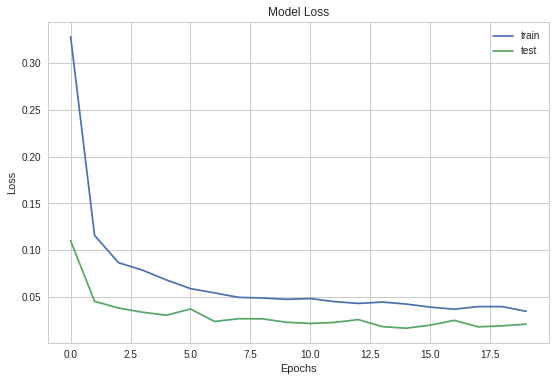

In [31]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

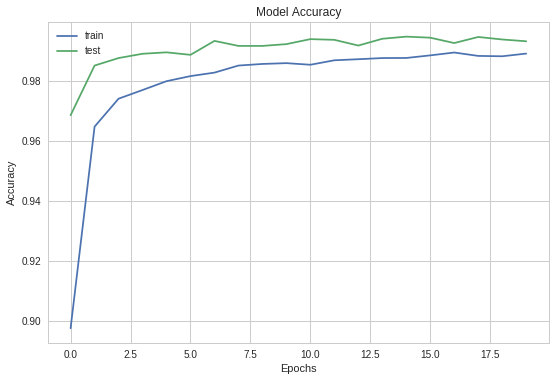

In [32]:
plt.plot(History.history['acc'])
plt.plot(History.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

Below I have displayed some correctly classified and misclassified images which just helps it visualize better.

In [0]:
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==6):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==6):
        break


#### CORRECTLY CLASSIFIED IMAGES.

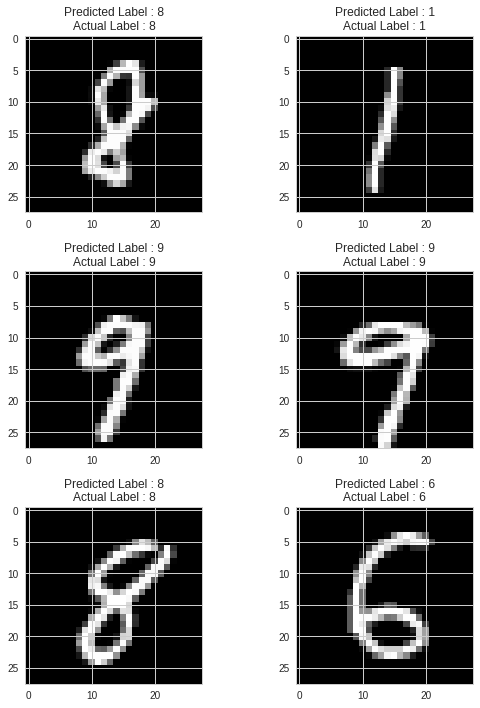

In [34]:
count=0
fig,ax=plt.subplots(3,2)
fig.set_size_inches(10,10)
for i in range (3):
    for j in range (2):
        ax[i,j].imshow(x_test[prop_class[count]].reshape(28,28),cmap='gray')
        ax[i,j].set_title("Predicted Label : "+str(pred_digits[prop_class[count]])+"\n"+"Actual Label : "+str(np.argmax(y_test[prop_class[count]])))
        plt.tight_layout()
        count+=1
        

#### MISCLASSIFIED IMAGES.

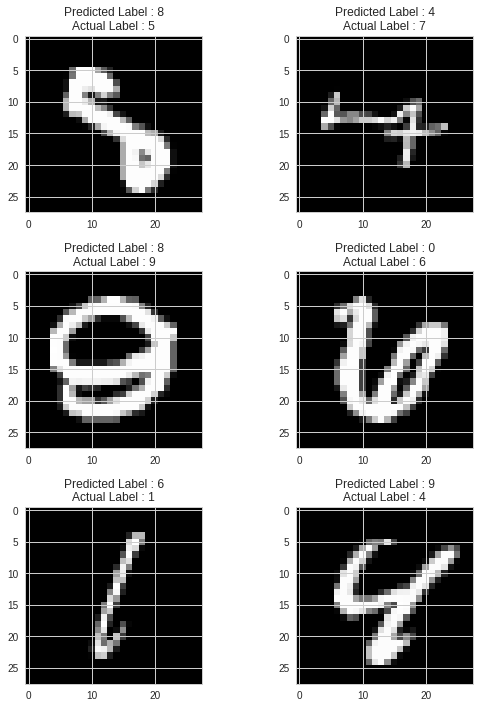

In [35]:
count=0
fig,ax=plt.subplots(3,2)
fig.set_size_inches(10,10)
for i in range (3):
    for j in range (2):
        ax[i,j].imshow(x_test[mis_class[count]].reshape(28,28),cmap='gray')
        ax[i,j].set_title("Predicted Label : "+str(pred_digits[mis_class[count]])+"\n"+"Actual Label : "+str(np.argmax(y_test[mis_class[count]])))
        plt.tight_layout()
        count+=1
        

## 7 ) Making Submission to Kaggle¶

In [0]:
pred_digits_test=np.argmax(model.predict(num_test),axis=1)
image_id_test=[]
for i in range (len(pred_digits_test)):
    image_id_test.append(i+1)
d={'ImageId':image_id_test,'Label':pred_digits_test}
answer=pd.DataFrame(d)
answer.to_csv('answer.csv',index=False)


# THE END.

## [Please star/upvote if u like it.]